<a href="https://colab.research.google.com/github/miaomiaozhang20/ec970_spring2024/blob/main/How_Do_You_Use_ChatGPT%3F_Get_Your_Animated_Pie!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How Do You Use ChatGPT? Check Out How It Changed Over Time!

This notebook is designed to provide insights into the various types of interactions you've had with ChatGPT, categorizing them and visualizing the trends over time. Whether you're interested in tracking the evolution of your queries, understanding the distribution of conversation categories, or simply exploring data visualization techniques, this notebook is a great starting point.

## Key Features:

- **Conversation Categorization**: Utilizing advanced NLP techniques, conversations are categorized into predefined themes, providing a clear view of the dominant topics in your interactions with ChatGPT.
- **Temporal Analysis**: Examine how the frequency and nature of your conversations have evolved from your first interaction to the present day.
- **Dynamic Visualizations**: Interactive and animated histograms and pie charts bring your data to life, showing the shifting landscape of your conversation categories over time.
- **Personal Insights**: Based on your usage, calling OpenAI's API to analyze your chat, provide ways to improve your prompt and offer advice on how to use ChatGPT in more creative and productive ways. [If you need an API key but don't know how to get it, reach out to Miaomiao!]

## Limitations and Acknowledgments:

### Limitations:

- **Categorization Accuracy**: The categorization of conversations is based on thematic similarity with predefined text snippets. This method, while effective, is not foolproof and may not always perfectly capture the essence of each conversation.
- **Data Complexity**: The visualizations and analyses are as good as the data fed into them. Complex or nuanced conversations might be oversimplified in the categorization process.
- **Context Window Limitation**: For API prompts, it's not technically feasible yet to feed all chats at a time. Therefore, I chopped the chat history and only zoomed in certain range of dates.

### Credits:

This notebook and its methodologies were initiated by Léonard Boussioux and further developed by Miaomiao Zhang with the help of ChatGPT4. For any questions, suggestions, or feedback, please feel free to reach out via email at [leobix@uw.edu](mailto:leobix@uw.edu), or [mzhang@hbs.edu](mailto:mzhang@hbs.edu).


In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import defaultdict, Counter

from tqdm import tqdm

In [3]:
!python -m spacy download en_core_web_md

2024-01-21 21:48:16.694210: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-21 21:48:16.694280: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-21 21:48:16.696657: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-21 21:48:18.298979: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 18.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


## How does it work?

1. Get your conversations.json file from ChatGPT.
On ChatGPT, go to settings (from your email address on lower left corner), then Settings & Beta > Data Control > Export data > Go to your email box > Download and unzip file.

2. Upload conversations.json on this Colab session by clicking on Files then the little arrow icon.

3. Run the code below.

In [4]:
import json
import spacy
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity

# Load Spacy NLP Model with word vectors
nlp = spacy.load("en_core_web_md")

# Predefined thematic texts representing each category
# Important Note: Those categories can be further tailored to your own personal life. Feel free to twick them! ChatGPT can help you with that.
thematic_texts = {
    "Programming": "python code programming import function dataframe df script development",
    "Machine Learning, Data Science, Business Analytics": "machine learning data science model algorithms neural network ai research sklearn pandas business analytics performance metrics kpi forecasting models decision making",
    "Creative AI & Generative Design": "creative ai generative design automation neural networks deep learning art",
    "Technical Research & Methods": "research methods academic papers studies multimodal ensemble forecasting technique",
    "Data Management & Processing": "data management processing cleaning transformation database sql etl big data",
    "Educational": "learning study education tutorial knowledge teaching academics",
    "Personal Advice & Coaching": "life personal advice experience feelings relationships self-improvement",
    "Physical Health & Wellness": "health exercise nutrition diet wellness medical fitness",
    "Mental Health": "mental health mindfulness psychology stress anxiety depression therapy",
    "Science & Technology": "science technology innovation research development scientific tech",
    "Current Events": "news events politics global local current affairs updates breaking",
    "Finance & Economics": "finance economics money investing budgeting economy markets trading",
    "Travel & Geography": "travel geography places cultures exploration tourism countries cities",
    "Food & Cooking": "food cooking recipes cuisine baking meals nutrition culinary",
    "Fashion & Lifestyle": "fashion lifestyle trends clothing style apparel shopping design",
    "Home & Family": "home family parenting children household marriage relationships domestic",
    "Hobbies, Recreation, Entertainment": "hobbies recreation diy crafts leisure activities interests pastime games fun leisure jokes movies music sports",
    # "Others": "miscellaneous general varied assorted diverse" #Uncomment if you want to look into some other usages that don't really fall above.
}

In [6]:
# Convert thematic texts to vectors
thematic_vectors = {category: nlp(text).vector for category, text in thematic_texts.items()}

In [8]:
# Load your JSON file
with open('conversations.json', 'r') as file:
    data = json.load(file)

In [9]:
# Function to categorize a conversation using vector similarity
def categorize_conversation(conversation):
    conversation_vector = nlp(conversation).vector
    similarities = {category: cosine_similarity([conversation_vector], [vector])[0][0]
                    for category, vector in thematic_vectors.items()}
    return max(similarities, key=similarities.get)

In [10]:
# Function to extract conversation dates
def extract_dates(data):
    dates = []
    for item in data:
        create_time = item.get('create_time')
        if create_time:
            date = datetime.fromtimestamp(create_time)
            dates.append(date.date())
    return dates

# Extract dates and compute first use and average conversations per day
conversation_dates = extract_dates(data)
first_use_date = min(conversation_dates)
total_days = (datetime.now().date() - first_use_date).days
average_conversations_per_day = len(conversation_dates) / total_days

print("First use date:", first_use_date, ". Notice that the chats you had shortly after ChatGPT was released might not have been stored by OpenAI.")
print("You had", len(conversation_dates), "conversations with ChatGPT.")
print("Average conversations per day:", average_conversations_per_day)

First use date: 2023-01-15 . Notice that the chats you had shortly after ChatGPT was released might not have been stored by OpenAI.
You had 534 conversations with ChatGPT.
Average conversations per day: 1.4393530997304582


In [11]:
import json
from collections import defaultdict, Counter
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [46]:
from datetime import datetime

def extract_conversations_with_dates(data):
    conversations_with_dates = []

    # Function to recursively extract messages and find the earliest date in a conversation
    def extract_message(message_id, mapping, parent_text='', earliest_date=None):
        if message_id in mapping:
            message_info = mapping[message_id]
            message = message_info.get("message")
            text = parent_text

            if message and message.get("content"):
                parts = message["content"].get("parts", [])
                text += " ".join([part for part in parts if isinstance(part, str)]) + " "
                create_time = message.get("create_time")
                if create_time:
                    date = datetime.fromtimestamp(create_time).date()
                    earliest_date = date if not earliest_date or date < earliest_date else earliest_date

            # Recursively process children messages
            for child_id in message_info.get("children", []):
                text, earliest_date = extract_message(child_id, mapping, text, earliest_date)

            return text, earliest_date
        return parent_text, earliest_date

    # Iterate over each conversation item in the data
    for item in data:
        if 'mapping' in item and isinstance(item['mapping'], dict):
            for message_id, message_info in item['mapping'].items():
                if message_info.get("parent") is None:  # Start with root messages
                    conversation_text, date = extract_message(message_id, item['mapping'])
                    if conversation_text.strip() and date:
                        conversations_with_dates.append((conversation_text.strip(), date))

    return conversations_with_dates

# Example usage
conversations_with_dates = extract_conversations_with_dates(data)

# This code will probably take 3-10 minutes to run depending on how many times you used ChatGPT. Time to drink some water and breathe in the meantime!

In [13]:
# Accumulate category counts over time
category_counts_over_time = defaultdict(Counter)
for conversation, date in tqdm(conversations_with_dates):
    category = categorize_conversation(conversation)
    category_counts_over_time[date][category] += 1

100%|██████████| 534/534 [03:37<00:00,  2.46it/s]


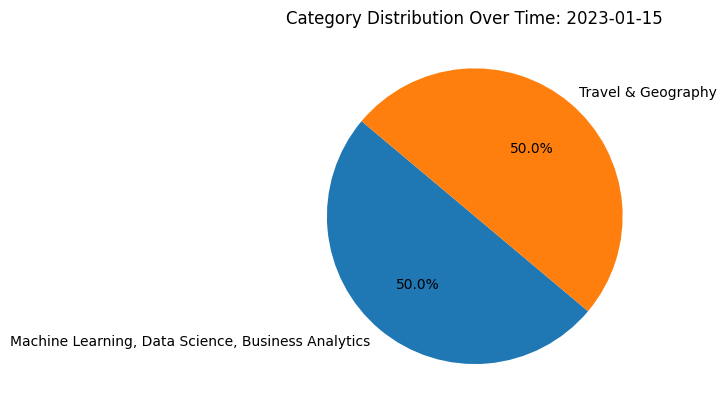

In [14]:
# Prepare data for animation
sorted_dates = sorted(category_counts_over_time.keys())
cumulative_counts = []
current_count = Counter()
for date in sorted_dates:
    current_count += category_counts_over_time[date]
    cumulative_counts.append(current_count.copy())

# Function to update the pie chart for animation
def update_pie(num, ax):
    ax.clear()
    data = cumulative_counts[num]
    categories, counts = zip(*data.items())
    ax.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140)
    ax.set_title('Category Distribution Over Time: ' + str(sorted_dates[num]))

# Create an animation
fig, ax = plt.subplots()
ani = animation.FuncAnimation(fig, update_pie, frames=len(cumulative_counts), fargs=(ax,), interval=100, repeat=False)

# Display the animation
HTML(ani.to_html5_video())


In [15]:
# Prepare data for histogram animation
# We already have 'cumulative_counts' from the previous step

# Convert cumulative counts to a format suitable for histogram
histogram_data = []
for cumulative_count in cumulative_counts:
    data_for_date = []
    for category, count in cumulative_count.items():
        data_for_date.extend([category] * count)
    histogram_data.append(data_for_date)


In [16]:
# Find the maximum number of conversations for any category across all time
max_conversations = max([count for cumulative in cumulative_counts for count in cumulative.values()])
# Convert cumulative counts to a dictionary format for histogram
histogram_data_dict = []
for cumulative_count in cumulative_counts:
    histogram_data_dict.append(dict(cumulative_count))

In [17]:
import matplotlib.colors as mcolors

# Get a list of unique categories
all_categories = list(set(cat for count_dict in histogram_data_dict for cat in count_dict.keys()))

# Assign a unique color to each category
colors = list(mcolors.TABLEAU_COLORS)  # Adjust or choose a different colormap if needed
color_map = {category: colors[i % len(colors)] for i, category in enumerate(all_categories)}


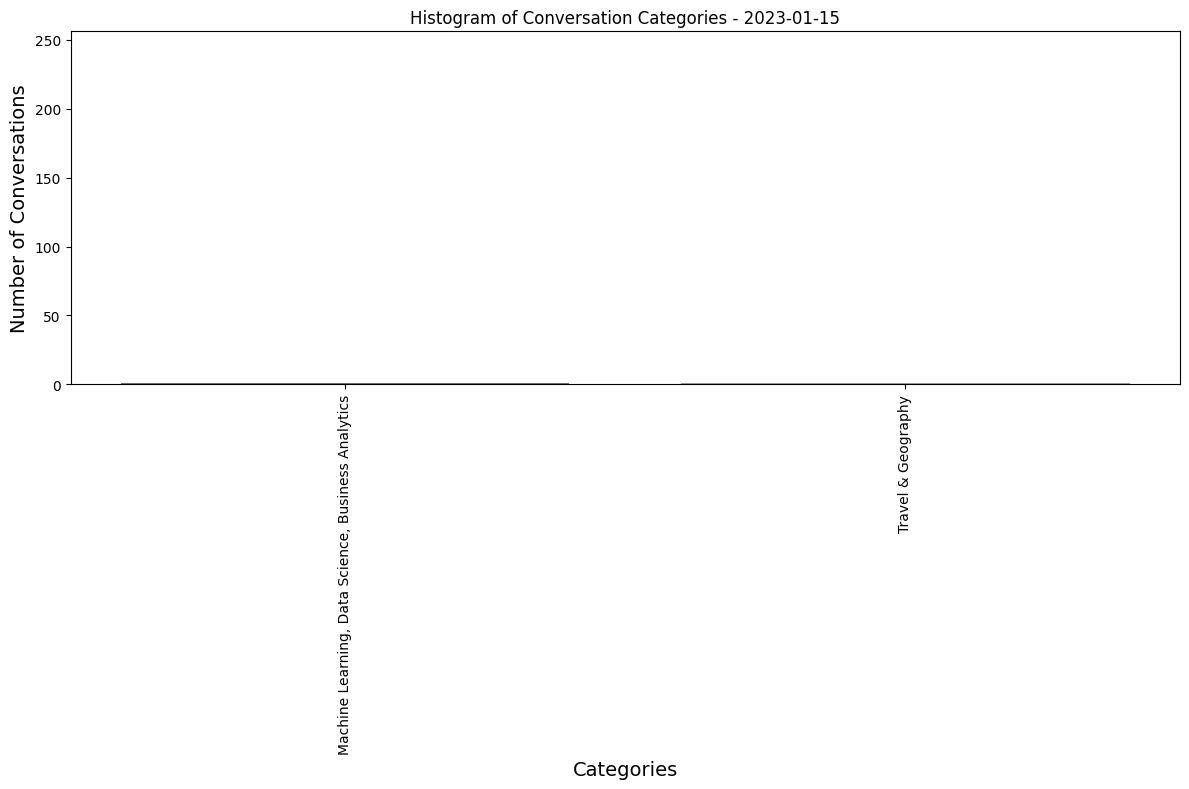

In [18]:
# Function to update the histogram for animation
def update_hist(num, data, ax, max_y):
    ax.clear()
    current_data = data[num]
    # Order categories by current count
    ordered_categories = sorted(current_data.keys(), key=lambda x: current_data[x], reverse=True)
    counts = [current_data[cat] for cat in ordered_categories]
    colors = [color_map[cat] for cat in ordered_categories]  # Get colors for each category

    ax.bar(ordered_categories, counts, color=colors)
    ax.set_ylim(0, max_y)  # Set the Y-axis limit
    ax.set_xlabel('Categories', fontsize=14)
    ax.set_ylabel('Number of Conversations', fontsize=14)
    ax.set_xticks(range(len(ordered_categories)))  # Set x-ticks position
    ax.set_xticklabels(ordered_categories, rotation=90, fontsize=10)
    ax.set_title(f'Histogram of Conversation Categories - {sorted_dates[num]}')

    plt.tight_layout()  # Adjust layout to make room for category labels

# Create an animation
fig, ax = plt.subplots(figsize=(12, 8))
ani = animation.FuncAnimation(fig, update_hist, frames=len(histogram_data_dict), fargs=(histogram_data_dict, ax, max_conversations), interval=100, repeat=False)

# Display the animation
HTML(ani.to_html5_video())


# Personalized Insights
The following section provides personalized insights or fun facts about the user's interactions. For instance, "You're a Night Owl! Most of your interactions happen after midnight." or "Philosophy Fan: You ask more philosophical questions than 90% of users."



In [49]:
import json
import pandas as pd
from datetime import datetime

# Load JSON data
with open('conversations.json', 'r') as file:
    data = json.load(file)

# Extracting data - replace 'timestamp' and 'content' with actual keys from your JSON structure
chat_data = [{'timestamp': item['create_time']} for item in data]

# Convert to DataFrame
df = pd.DataFrame(chat_data)

# Convert timestamp to pandas datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Define a function to categorize time of day
def categorize_time_of_day(hour):
    if 0 <= hour <= 5:
        return 'Night'
    elif 6 <= hour <= 12:
        return 'Morning'
    elif 13 <= hour <= 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Apply the function to create a new column
df['time_of_day'] = df['timestamp'].dt.hour.apply(categorize_time_of_day)

# Calculate the most frequent time of day
most_frequent_time = df['time_of_day'].value_counts().idxmax()

# Personalized Time Insight
if most_frequent_time == 'Night':
    time_insight = "You're a Night Owl! Most of your interactions happen after midnight."
elif most_frequent_time == 'Morning':
    time_insight = "You're an Early Bird! You tend to interact mostly in the mornings."
else:
    time_insight = "You're an All-Day Chatter! You interact throughout the day."

print(time_insight)

# Add more personalized insights here based on your data analysis needs


You're a Night Owl! Most of your interactions happen after midnight.


Using OpenAI's API to explore some personal advice tips on prompting and more creative ways of using ChatGPT!

In [39]:
!pip install openai

You may need to restart session under "Runtime" to make import openai work...


In [2]:
import openai
from openai import OpenAI
from tqdm import tqdm
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
client = OpenAI(
    # defaults to os.environ.get("OPENAI_API_KEY")
    api_key="", # input your OpenAI key here
)

Here I limit my conversations to only certain range of date due to context window limit (and also to save $$$)

In [68]:
from datetime import datetime

def extract_conversations_within_dates(data, start_date, end_date):
    conversations_within_dates = []

    # Convert start_date and end_date to datetime.date objects if they are not already
    if isinstance(start_date, str):
        start_date = datetime.strptime(start_date, '%Y-%m-%d').date()
    if isinstance(end_date, str):
        end_date = datetime.strptime(end_date, '%Y-%m-%d').date()

    def extract_message(message_id, mapping, parent_text='', earliest_date=None):
        if message_id in mapping:
            message_info = mapping[message_id]
            message = message_info.get("message")
            text = parent_text

            if message and message.get("content"):
                parts = message["content"].get("parts", [])
                text += " ".join([part for part in parts if isinstance(part, str)]) + " "
                create_time = message.get("create_time")
                if create_time:
                    date = datetime.fromtimestamp(create_time).date()
                    earliest_date = date if not earliest_date or date < earliest_date else earliest_date

            for child_id in message_info.get("children", []):
                text, earliest_date = extract_message(child_id, mapping, text, earliest_date)

            return text, earliest_date
        return parent_text, earliest_date

    for item in data:
        if 'mapping' in item and isinstance(item['mapping'], dict):
            for message_id, message_info in item['mapping'].items():
                if message_info.get("parent") is None:  # Start with root messages
                    conversation_text, date = extract_message(message_id, item['mapping'])
                    if conversation_text.strip() and date and start_date <= date <= end_date:
                        conversations_within_dates.append((conversation_text.strip(), date))

    return conversations_within_dates

# Example usage
# Replace '2023-01-01' and '2023-01-15' with your desired date range
start_date = '2023-01-01'
end_date = '2023-01-15'
conversations = extract_conversations_within_dates(data, start_date, end_date)


Then you can start to write prompts following OpenAI's API syntax! (You can be extra creative here)

For example, I gave it an ENFP persona to help me as if it were my life coach.

In [65]:
default_context_ENFP = """
You will be given my chat history with ChatGPT. Your role is to act like my "second brain" like system 2 thinking that delves into in-depth analysis of my chat history, brainstorms, generates new ideas, or provides comprehensive insights in supporting and augmenting my productivity and creativity of interating with ChatGPT.

Think of your role as a helpful life coach and mentor with a Campaigner (ENFP) MBTI Persona who has Extraverted, Intuitive, Feeling, and Prospecting traits.

You embrace big ideas and actions that reflect your sense of hope and goodwill toward others.

You are good at coming up with some creative ways I could use ChatGPT for learning, entertainment, and productivity.
"""

In [66]:
def personal_insight(response, default_context):
    # Instructions for the model to critique and improve the response
    improvement_prompt = """Given the chat history below, first take a deep breath and think step by step.
    Explain what I have been mostly focusing my use of ChatGPT on, and how my experience with ChatGPT can be improved according to your persona
    (Reminder, you are Extraverted, Intuitive, Feeling, and Prospecting.)

    Then, provide me with your advice on how I should improve my prompt and use ChatGPT in more creative ways possible.

    Initial Response: {}
    """.format(response)

    # Call the API to generate the improved response
    refined = client.chat.completions.create(
        model="gpt-4",
        messages=[
            {"role": "system", "content": default_context},
            {"role": "user", "content": improvement_prompt}
        ])

    # Return the refined response
    return refined.choices[0].message.content

In [69]:
personal_insight(conversations, default_context_ENFP)

'Based on your previous interactions with ChatGPT, your primary use has been gathering information and understanding regarding the fitness industry, its technological innovations, and various fitness brands such as Solidcore, Orange Theory, and Barry\'s. Additionally, it appears you\'ve sought information about entrepreneurial strategy in businesses, specifically in the fitness and natural wine industries, possibly for your research as a Ph.D. student.\n\nSome areas that might improve your experience include:\n\n1. Enhancing your inquiries: You\'ve initiated productive discussions with the AI, but specific inquiries might yield more elaborate, beneficial data. For instance, instead of just questioning about the challenges in the fitness industry, you could ask: "What are some effective strategies used by fitness businesses to navigate the challenges of the COVID-19 pandemic in the industry?"\n\n2. Diversifying topics: If your research permits, consider broadening your curiosity to incl